In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.integrate import quad_vec
import matplotlib.animation as animation

In [2]:
tpi = 2 * np.pi
img = cv2.imread("test_animal2.png")

In [3]:
def renderimage(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0) 
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours = np.array(contours[1])
    return contours

def sort_coefficient(coef):
    new = []
    new.append(coef[N])
    for i in range(1, N+1):
        new.extend([coef[N+i],coef[N-i]])
    return np.array(new)

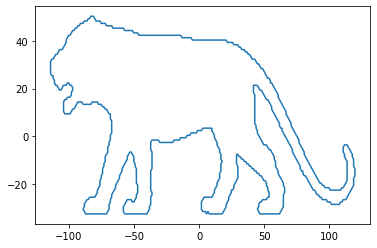

(-125.93564593301436, 131.46435406698563)
(-36.78636363636364, 54.51363636363636)


In [4]:
contours = renderimage(img)
x, y = contours[:, :, 0].reshape(-1,), -contours[:, :, 1].reshape(-1,)
x_l = x - np.mean(x)
y_l = y - np.mean(y)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_l, y_l)
xlim_data = plt.xlim() 
ylim_data = plt.ylim()
plt.show()
print(xlim_data)
print(ylim_data)
N = 100

In [5]:
t_l = np.linspace(0, tpi, len(x_l))

In [6]:
def f(t, t_list, x_list, y_list):
    return np.interp(t, t_list, x_list + 1j*y_list)

In [7]:
c = []
const = 1/tpi
for i in range(-N, N+1):
    coef = const*quad_vec(lambda temp: f(temp, t_l, x_l, y_l)*np.exp(-i*temp*1j), 
                          0, tpi, 100, 1)[0]
    c.append(coef)

In [8]:
c = np.array(c)
print(c.shape)

(201,)


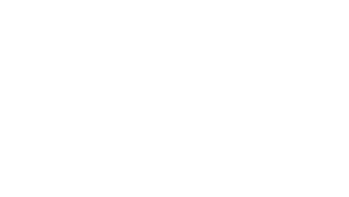

In [9]:
fig, ax = plt.subplots()

circles = [ax.plot([], [], 'b-', linewidth = 0.25)[0] for i in range(-N, N+1)]
circle_lines = [ax.plot([], [], 'b-', linewidth = 0.25)[0] for i in range(-N, N+1)]
drawing, = ax.plot([], [], 'k-', linewidth=1)
og_d, = ax.plot([], [], 'g-', linewidth=0.25)

ax.set_xlim(xlim_data[0]-10, xlim_data[1]+10)
ax.set_ylim(ylim_data[0]-30, ylim_data[1]+30)
ax.set_axis_off()
ax.set_aspect('equal')
d_x = []
d_y = []

In [10]:
def cframe(frame_number, angle, coeff):
    time = angle[frame_number]
    exp = np.array([np.exp(n*time*1j) for n in range(-N, N+1)])
    coeff = sort_coefficient(coeff * exp)
    x_C = np.real(coeff)
    y_C = np.imag(coeff)
    center_x = 0
    center_y = 0
    
    for i, (x_C, y_C) in enumerate(zip(x_C, y_C)):
        r = np.linalg.norm([x_C, y_C]) 
        theta = np.linspace(0, tpi, num=50) 
        x, y = center_x + r * np.cos(theta), center_y + r * np.sin(theta)
        circles[i].set_data(x, y)
        
        x, y = [center_x, center_x + x_C], [center_y, center_y + y_C]
        circle_lines[i].set_data(x, y)
        center_x += x_C
        center_y += y_C
        
    d_x.append(center_x)
    d_y.append(center_y)
    drawing.set_data(d_x,d_y)
    og_d.set_data(x_l,y_l)

In [11]:
Writer = animation.writers['ffmpeg']
metadata = dict(title='Final Project', artist='Matplotlib')
writer = Writer(fps=30, metadata=metadata, bitrate=5000)


In [12]:
time = np.linspace(0, 2*np.pi, 300)
anim = animation.FuncAnimation(fig, cframe, frames=300, fargs=(time, c),interval=5)


In [13]:
anim.save('animaltest.mp4', writer=writer)